# Cycle de vie d’un projet de Machine Learning (ML Lifecycle)

Dans le cadre de ce projet, nous suivons les grandes étapes classiques du cycle de vie d’un système de machine learning telles qu'étudiées en cours. Cela permet de garantir une approche rigoureuse, reproductible et industrialisable du développement du modèle.

---

## 1️⃣ Planning – Cadrage du projet
- **Compréhension du contexte métier** : prédire le risque de défaut d’un client pour une banque de détail.
- **Objectifs & critères de succès** : obtenir un bon compromis entre F1-score, précision et interprétabilité, tout en assurant un modèle prêt à être déployé.
- **Analyse de faisabilité** : données disponibles, nombre de variables limité, délais serrés → choix de modèles simples mais efficaces.

---

## 2️⃣ Data Preparation – Préparation des données
- Chargement, nettoyage, et premières transformations des données pour garantir leur qualité.
- Identification des variables explicatives pertinentes.
- Les étapes techniques suivantes (encodage, standardisation, split train/test) seront prises en charge dans les fichiers `.py` du projet, pour respecter une architecture propre et modulable.

Ce notebook constitue donc l’étape exploratoire de notre projet MLOps.  
L’objectif est de **mieux comprendre la structure des données**, d’identifier d’éventuelles erreurs ou incohérences, et de poser les bases du **choix des modèles de machine learning** à implémenter par la suite pour le déploiement.

In [1]:
# libraries

import pandas as pd


In [ ]:
# lecture et visualisation du dataset

data = pd.read_csv("../data/Loan_Data.csv")
data.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [24]:
print(data.shape)
print(data.info())
print(data.describe())
print(data.dtypes)

(10000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB
None
        customer_id  credit_lines_outstanding  loan_amt_outstanding  \
count  1.000000e+04              10000.000000          10000.000000   
mean   4.974577e+06                  1.461200           4159.677034   
std    2.293890e+06                  1.743846           1421.3

Le dataset ne contient aucun Nan

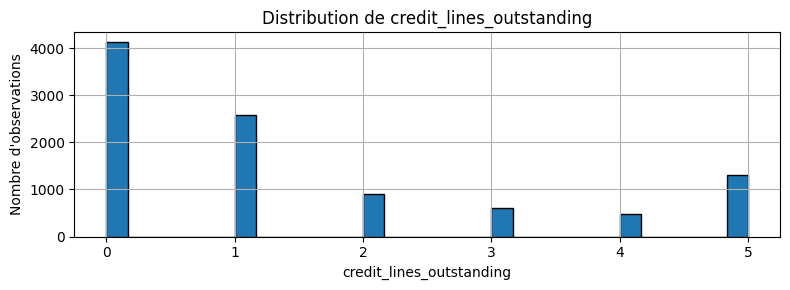

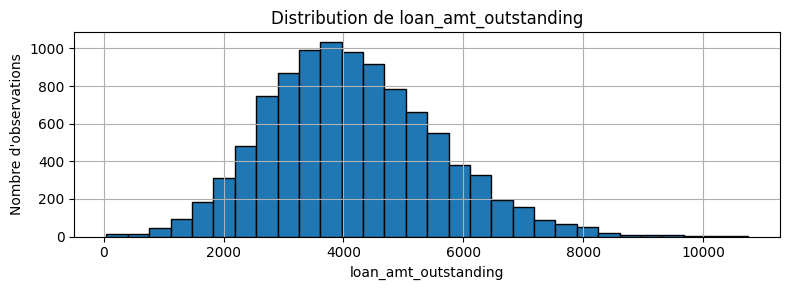

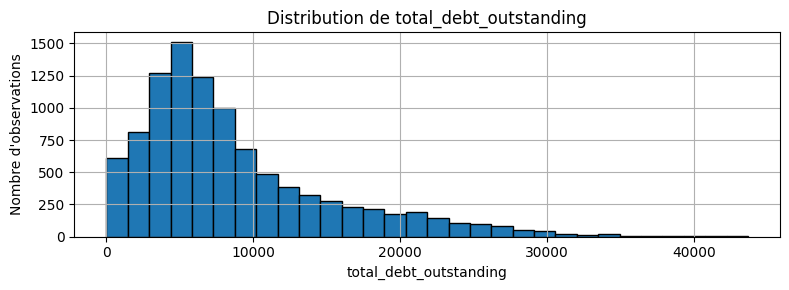

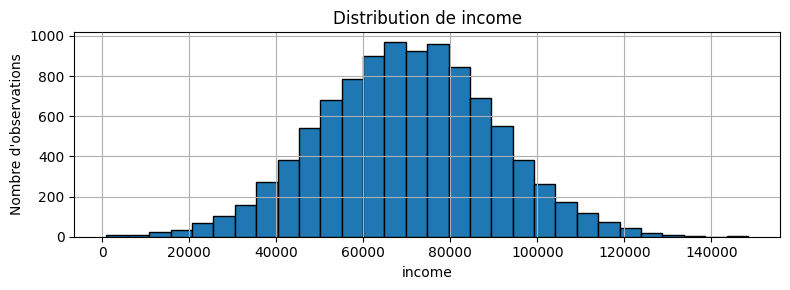

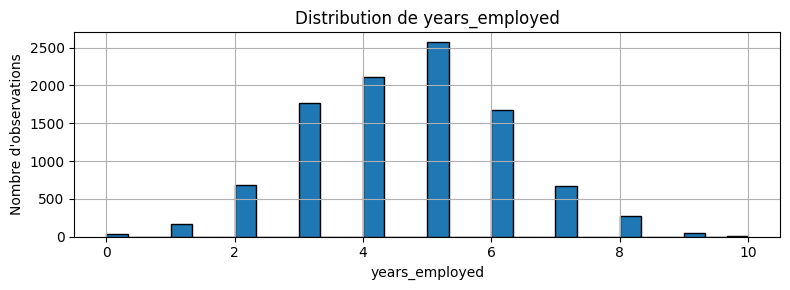

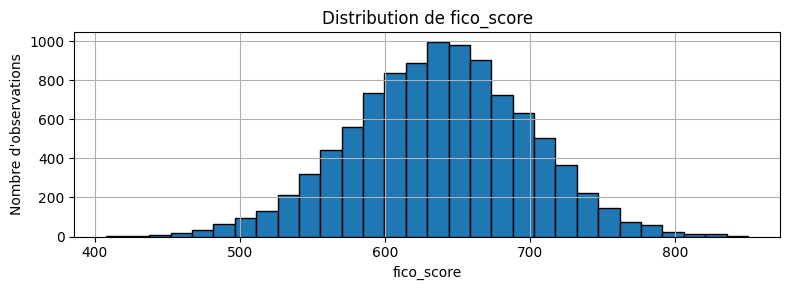

In [20]:
import matplotlib.pyplot as plt

# 2. Distribution des variables numériques
cols_to_plot = [
    "credit_lines_outstanding",
    "loan_amt_outstanding",
    "total_debt_outstanding",
    "income",
    "years_employed",
    "fico_score"
]

for col in cols_to_plot:
    plt.figure(figsize=(8, 3))
    plt.hist(data[col], bins=30, edgecolor='black')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre d'observations")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [25]:
print(data["default"].value_counts(normalize=True))


default
0    0.8149
1    0.1851
Name: proportion, dtype: float64


On observe un déséquilibre de classes important, avec une majorité de clients non défaillants (0). Ce déséquilibre devra être pris en compte dans le choix des métriques (comme le F1-score) et des modèles.



## Choix des modèles de Machine Learning

Nous avons sélectionné trois algorithmes de classification adaptés au contexte de notre projet (prédiction du défaut client). Ce choix repose sur la nature des données et les contraintes métier.



### 1️⃣ Logistic Regression – Base interprétable
- Modèle linéaire simple et rapide
- Idéal comme **baseline** de comparaison
- Fournit des **coefficients interprétables**, utiles en contexte bancaire
- Requiert des données **normalisées** et peu corrélées


In [28]:
# nous devons vérifier la corrélation des données avant de procéder
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
customer_id,1.000000,0.006729,-0.013857,0.003541,-0.008064,-0.008098,0.008044,0.006927
credit_lines_outstanding,0.006729,1.000000,0.080249,0.852210,0.022272,-0.087900,-0.258177,0.862815
loan_amt_outstanding,-0.013857,0.080249,1.000000,0.397403,0.835815,-0.158416,-0.031373,0.098978
total_debt_outstanding,0.003541,0.852210,0.397403,1.000000,0.394397,-0.174353,-0.232246,0.758868
income,-0.008064,0.022272,0.835815,0.394397,1.000000,0.001814,-0.010528,0.016309
years_employed,-0.008098,-0.087900,-0.158416,-0.174353,0.001814,1.000000,0.255873,-0.284506
fico_score,0.008044,-0.258177,-0.031373,-0.232246,-0.010528,0.255873,1.000000,-0.324515
default,0.006927,0.862815,0.098978,0.758868,0.016309,-0.284506,-0.324515,1.000000


On remarque une forte corrélation entre la probavilité de défaut (dernière colonne/ligne) avec credit_lines_outstanding et total_debt_outstanding.
Dans le cadre d'un premier modèle il peut être pertinent de n'inclure qu'une seule des deux variables à la fois



### 2️⃣ Random Forest – Robuste et efficace
- Modèle d’**ensemble d’arbres de décision** (bagging)
- Très performant sur des datasets **petits à moyens**
- Supporte les relations **non linéaires**
- Tolère les données bruitées, **pas besoin de scaling**


### 3️⃣ CatBoost – Gradient boosting moderne
- Modèle très puissant basé sur le **boosting**
- Gère automatiquement les **valeurs manquantes** et les données numériques
- **Rapide à entraîner**, même sur machine locale
- Excellente performance sans preprocessing lourd

# Conclusion

L’exploration de ce dataset permet donc de confirmer la pertinence de notre approche. Nous pouvons désormais passer à la concrétisation de ces trois modèles dans les fichiers .py